In [1]:
library(dplyr)
library(ggplot2)
library(RColorBrewer)
library(gprofiler2)
library(ComplexHeatmap)
library(circlize)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: grid
ComplexHeatmap version 2.2.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

circlize version 0.4.9
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackag

In [2]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/"
myfiles = list.files(mydir)

In [3]:
df0 = read.csv(paste0(mydir,myfiles[1]),row.names=1)
head(df0,2)

,gene,corr_cluster0
CALY,CALY,0.8322332
VGF,VGF,0.8130438


In [4]:
df = df0
for (i in 2:length(myfiles)){
    df0 = read.csv(paste0(mydir,myfiles[i]),row.names = 1)
    df = inner_join(df,df0,by="gene")
}
df

gene,corr_cluster0,corr_cluster1,corr_cluster10,corr_cluster11,corr_cluster12,corr_cluster2,corr_cluster3,corr_cluster4,corr_cluster5,corr_cluster6,corr_cluster7,corr_cluster8,corr_cluster9
CALY,0.8322332,0.319158573,0.4164211,0.4658422,-0.7401583,-0.5658100,0.4334862,0.49907627,-0.099368955,0.5952177,0.192475489,0.038508983,0.38566014
VGF,0.8130438,0.248245583,0.4474489,0.5481774,-0.6937207,-0.6839274,0.3656685,0.27944124,-0.142213963,0.5530567,-0.077517182,0.072877585,0.34180591
ACHE,0.7776608,0.248342816,0.3263434,0.4821674,-0.6119573,-0.5328144,0.4675485,0.38470059,-0.164983254,0.5475005,0.136936498,0.033570797,0.33105056
SCG2,0.7628341,0.298549704,0.6601885,0.3112086,-0.7549126,-0.5481949,0.2693136,0.20485036,0.072549505,0.6315517,-0.180486563,0.287475430,0.11611473
TMEM35,0.7541354,0.033028102,0.4111880,0.5235673,-0.5732031,-0.6501652,0.3509166,0.19899949,-0.159279583,0.4331349,-0.140653752,0.149975073,0.27653792
PRR24,0.7435457,0.154676196,0.3972345,0.4340479,-0.5601785,-0.5242625,0.4241671,0.19500460,-0.138734907,0.5610979,-0.065933882,0.168579461,0.21335101
TMEM59L,0.7424488,0.242449662,0.5551794,0.3281819,-0.7101546,-0.4908572,0.2629080,0.27068778,0.047506719,0.6276525,-0.060857283,0.234132210,0.15382253
LDHA,0.7327611,0.240160797,0.5189846,0.4425676,-0.6471036,-0.5798722,0.3757964,0.22865961,-0.058133048,0.5640385,-0.102670028,0.153368013,0.18563575
RBP4,0.7192600,0.247242919,0.4104089,0.5162839,-0.5524449,-0.6638975,0.4600144,0.28707835,-0.210521079,0.3847892,-0.075029715,0.045448407,0.30143321
SNCB,0.7167430,0.121213451,0.4525020,0.2971716,-0.6043994,-0.4101003,0.3882303,0.29980218,-0.012196563,0.5426510,0.051575558,0.235424446,0.16567315


In [5]:
rownames(df) = df$gene
df$gene = c()

In [6]:
head(df)

,corr_cluster0,corr_cluster1,corr_cluster10,corr_cluster11,corr_cluster12,corr_cluster2,corr_cluster3,corr_cluster4,corr_cluster5,corr_cluster6,corr_cluster7,corr_cluster8,corr_cluster9
CALY,0.8322332,0.3191586,0.4164211,0.4658422,-0.7401583,-0.5658100,0.4334862,0.4990763,-0.09936896,0.5952177,0.19247549,0.03850898,0.3856601
VGF,0.8130438,0.2482456,0.4474489,0.5481774,-0.6937207,-0.6839274,0.3656685,0.2794412,-0.14221396,0.5530567,-0.07751718,0.07287759,0.3418059
ACHE,0.7776608,0.2483428,0.3263434,0.4821674,-0.6119573,-0.5328144,0.4675485,0.3847006,-0.16498325,0.5475005,0.13693650,0.03357080,0.3310506
SCG2,0.7628341,0.2985497,0.6601885,0.3112086,-0.7549126,-0.5481949,0.2693136,0.2048504,0.07254950,0.6315517,-0.18048656,0.28747543,0.1161147
TMEM35,0.7541354,0.0330281,0.4111880,0.5235673,-0.5732031,-0.6501652,0.3509166,0.1989995,-0.15927958,0.4331349,-0.14065375,0.14997507,0.2765379
PRR24,0.7435457,0.1546762,0.3972345,0.4340479,-0.5601785,-0.5242625,0.4241671,0.1950046,-0.13873491,0.5610979,-0.06593388,0.16857946,0.2133510


In [9]:
write.csv(df, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/gene_cluster_correlations.csv", quote=F)

In [19]:
########### Genes positively correlated with cluster summary profiles

In [20]:
df_list = list()
for (i in 1:ncol(df)){
    gene_list = df[,i]
    names(gene_list) = rownames(df)
    # get positively correlated genes
    genes_pos = gene_list[gene_list>0.4]
    if (length(genes_pos)==0){next}
    # order
    genes_pos = genes_pos[order(genes_pos, decreasing = T)]
    # get gene names only
    genes = gsub(".*_","",names(genes_pos))
    # run gprofiler
    gres = gost(query=genes, organism = "hsapiens", ordered_query = TRUE, significant=FALSE)
    df_list[[i]] = as.data.frame(gres$result)
}

In [21]:
pats = c()
for (i in 1:length(df_list)){
    if (is.null(df_list[[i]])){next}
    df_curr = as.data.frame(df_list[[i]])
    df_curr = df_curr[df_curr$p_value < 0.05,]
#     print(nrow(df_curr))
    n = min(10, nrow(df_curr))
    pats = c(pats, unique(df_curr[1:n,"term_name"]))
}

In [22]:
length(pats)

[1] 120

In [23]:
df_to_plot = data.frame()
for (i in 1:length(df_list)){
#     print(i)
    cluster = gsub("corr_","",colnames(df)[i])
    df_curr = df_list[[i]]
    
    if (is.null(df_curr)){next}
    df_curr$cluster = cluster
    df_to_plot = rbind(df_to_plot, df_curr[df_curr$term_name %in% pats,
                                           c("p_value","cluster","term_name","term_id")])
}

In [24]:
unique(df_to_plot$cluster)
df_to_plot$cluster <- factor(df_to_plot$cluster, 
                             levels = c("cluster12", "cluster0", "cluster1", "cluster5", "cluster8",
                                        "cluster9", "cluster11", "cluster2", "cluster10", "cluster3", 
                                        "cluster6", "cluster7", "cluster4"))

[1] "cluster0"  "cluster1"  "cluster10" "cluster11" "cluster12" "cluster2" 
 [7] "cluster3"  "cluster4"  "cluster5"  "cluster6"  "cluster7"  "cluster8" 
[13] "cluster9"

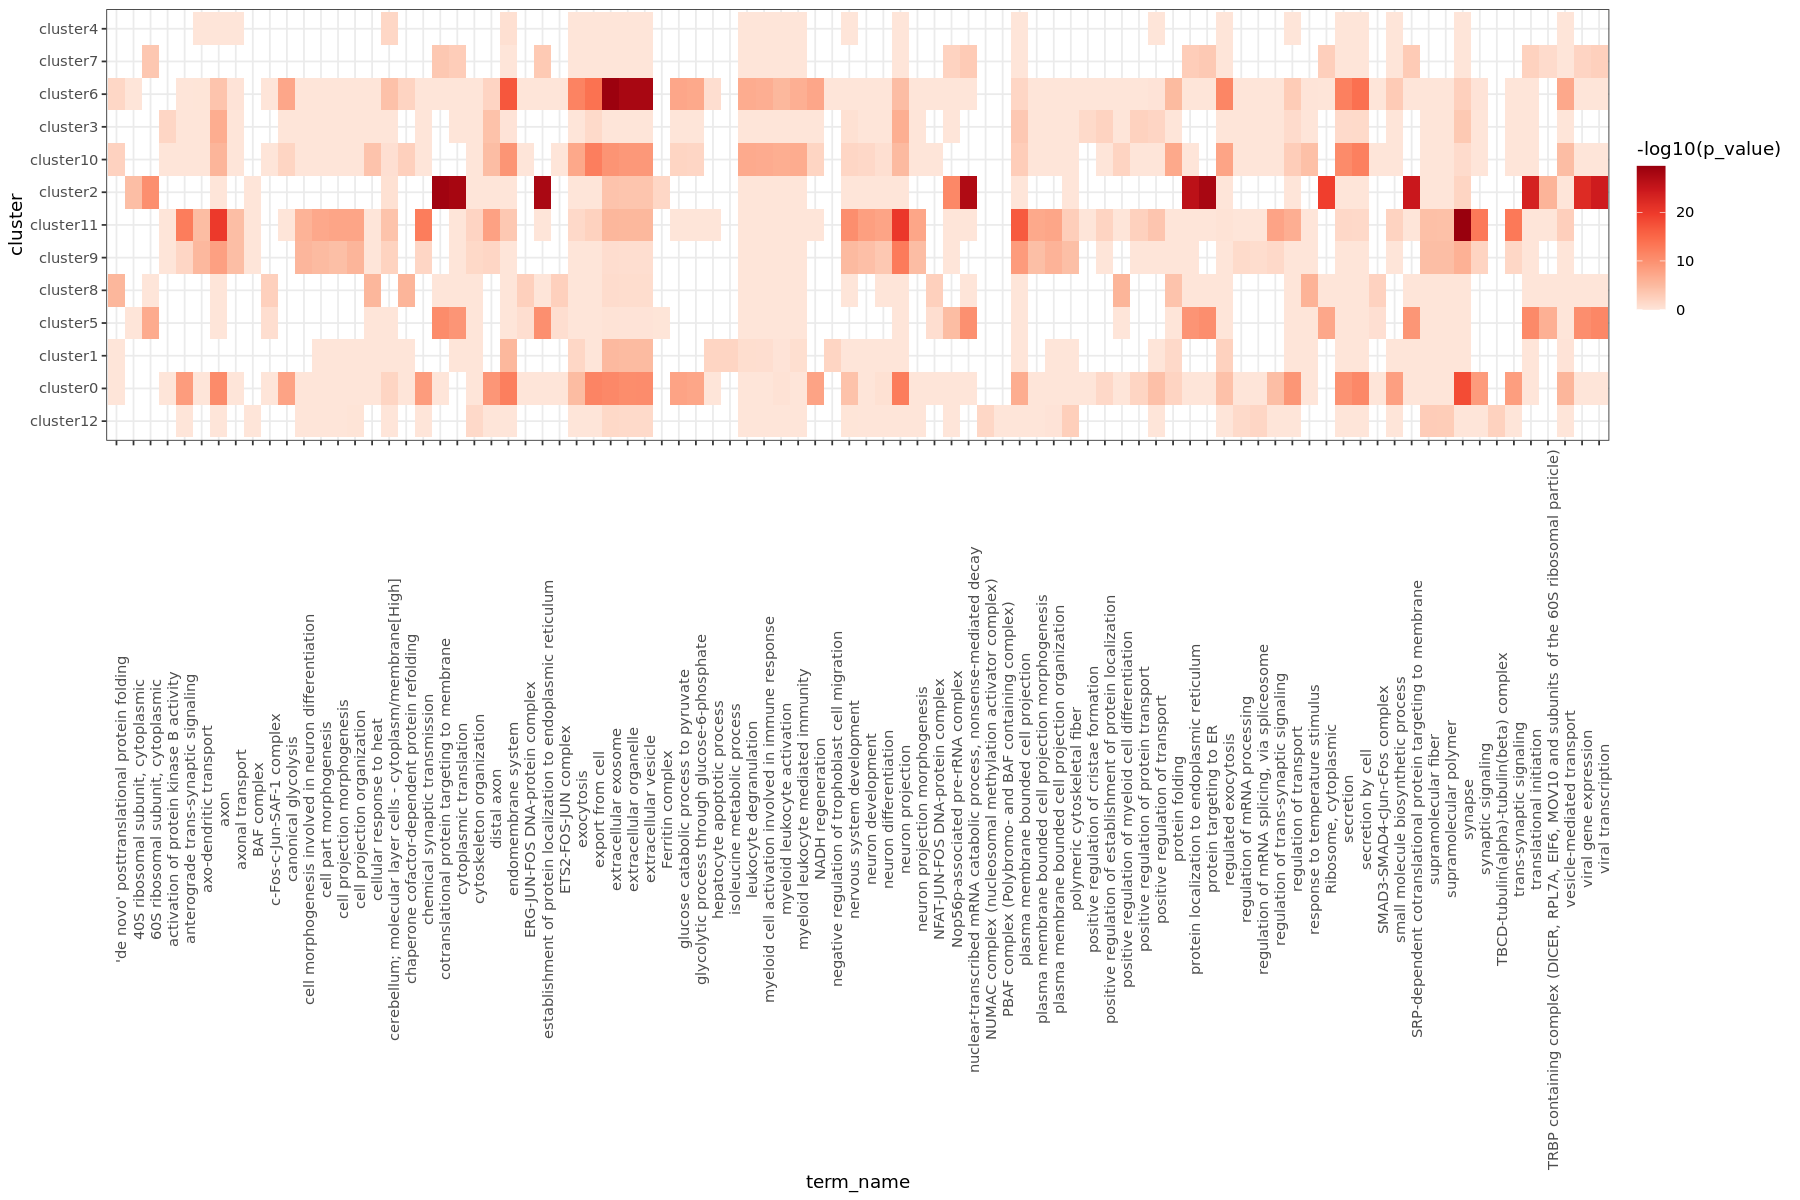

In [25]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(df_to_plot, aes(x=term_name, y=cluster, fill = -log10(p_value))) + geom_tile() + 
    theme_bw() + theme(axis.text.x = element_text(angle = 90)) + 
    scale_fill_gradientn(colors = brewer.pal(7,"Reds"))

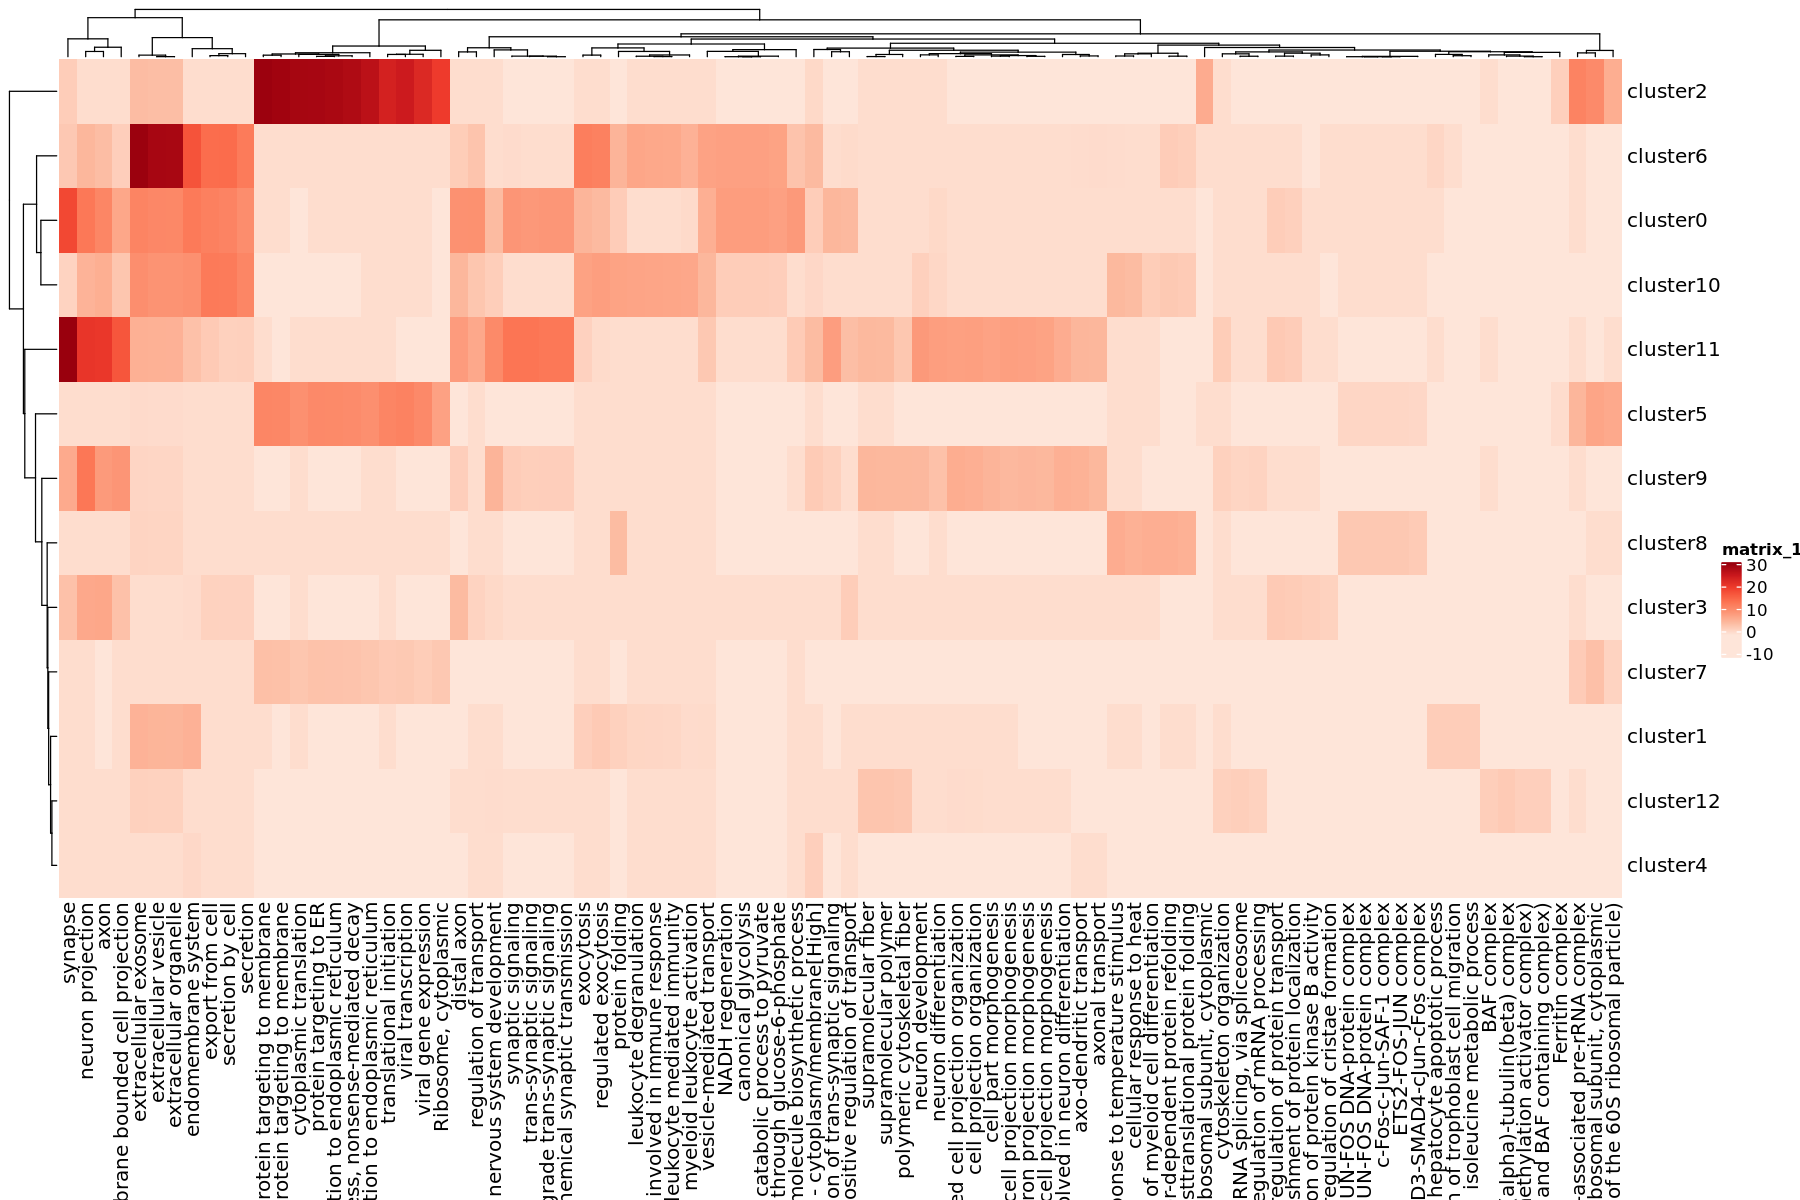

In [26]:
df_to_plot$cluster = as.character(df_to_plot$cluster)
df_to_plot$term_name = as.character(df_to_plot$term_name)
mat = matrix(0, nrow=length(unique(df_to_plot$cluster)), ncol=length(unique(df_to_plot$term_name)))
for (i in 1:nrow(mat)){
    cluster = unique(df_to_plot$cluster)[i]
    for (j in 1:ncol(mat)){
        term = unique(df_to_plot$term_name)[j]
#         print(term)
        if (length(df_to_plot[df_to_plot$cluster == cluster & df_to_plot$term_name == term,"p_value"]) == 0){next}
        mat[i,j] = min(df_to_plot[df_to_plot$cluster == cluster & df_to_plot$term_name == term,"p_value"])
    }
}
rownames(mat) = unique(df_to_plot$cluster)
colnames(mat) = unique(df_to_plot$term_name)
mat0 = -log10(mat)
mat0[mat0==Inf] = -1
Heatmap(mat0, col = brewer.pal(7,"Reds"))

In [27]:
########### Genes negatively correlated with cluster summary profiles

In [28]:
df_list = list()
for (i in 1:ncol(df)){
    gene_list = df[,i]
    names(gene_list) = rownames(df)
#     print(head(gene_list))
    # get negatively correlated genes
    genes_neg = gene_list[gene_list<(-0.4)]
    if (length(genes_neg)==0){next}
    # order
    genes_neg = genes_neg[order(genes_neg)]
    # get gene names only
    genes = gsub(".*_","",names(genes_neg))
    # run gprofiler
    gres = gost(query=genes, organism = "hsapiens", ordered_query = TRUE, significant=FALSE)
    df_list[[i]] = as.data.frame(gres$result)
}

In [29]:
pats = c()
for (i in 1:length(df_list)){
    if (is.null(df_list[[i]])){next}
    df_curr = as.data.frame(df_list[[i]])
    df_curr = df_curr[df_curr$p_value < 0.05,]
#     print(nrow(df_curr))
    n = min(10, nrow(df_curr))
    pats = c(pats, unique(df_curr[1:n,"term_name"]))
}
length(pats)

[1] 91

In [30]:
df_to_plot = data.frame()
for (i in 1:length(df_list)){
#     print(i)
    cluster = gsub("corr_","",colnames(df)[i])
    df_curr = df_list[[i]]
    
    if (is.null(df_curr)){next}
    df_curr$cluster = cluster
    df_to_plot = rbind(df_to_plot, df_curr[df_curr$term_name %in% pats,
                                           c("p_value","cluster","term_name","term_id")])
}
unique(df_to_plot$cluster)
df_to_plot$cluster <- factor(df_to_plot$cluster, 
                             levels = c("cluster12", "cluster0", "cluster1", "cluster5", "cluster8",
                                        "cluster9", "cluster11", "cluster2", "cluster10", "cluster3",
                                        "cluster6", "cluster7", "cluster4"))

[1] "cluster0"  "cluster1"  "cluster10" "cluster11" "cluster12" "cluster2" 
 [7] "cluster5"  "cluster6"  "cluster8"  "cluster9"

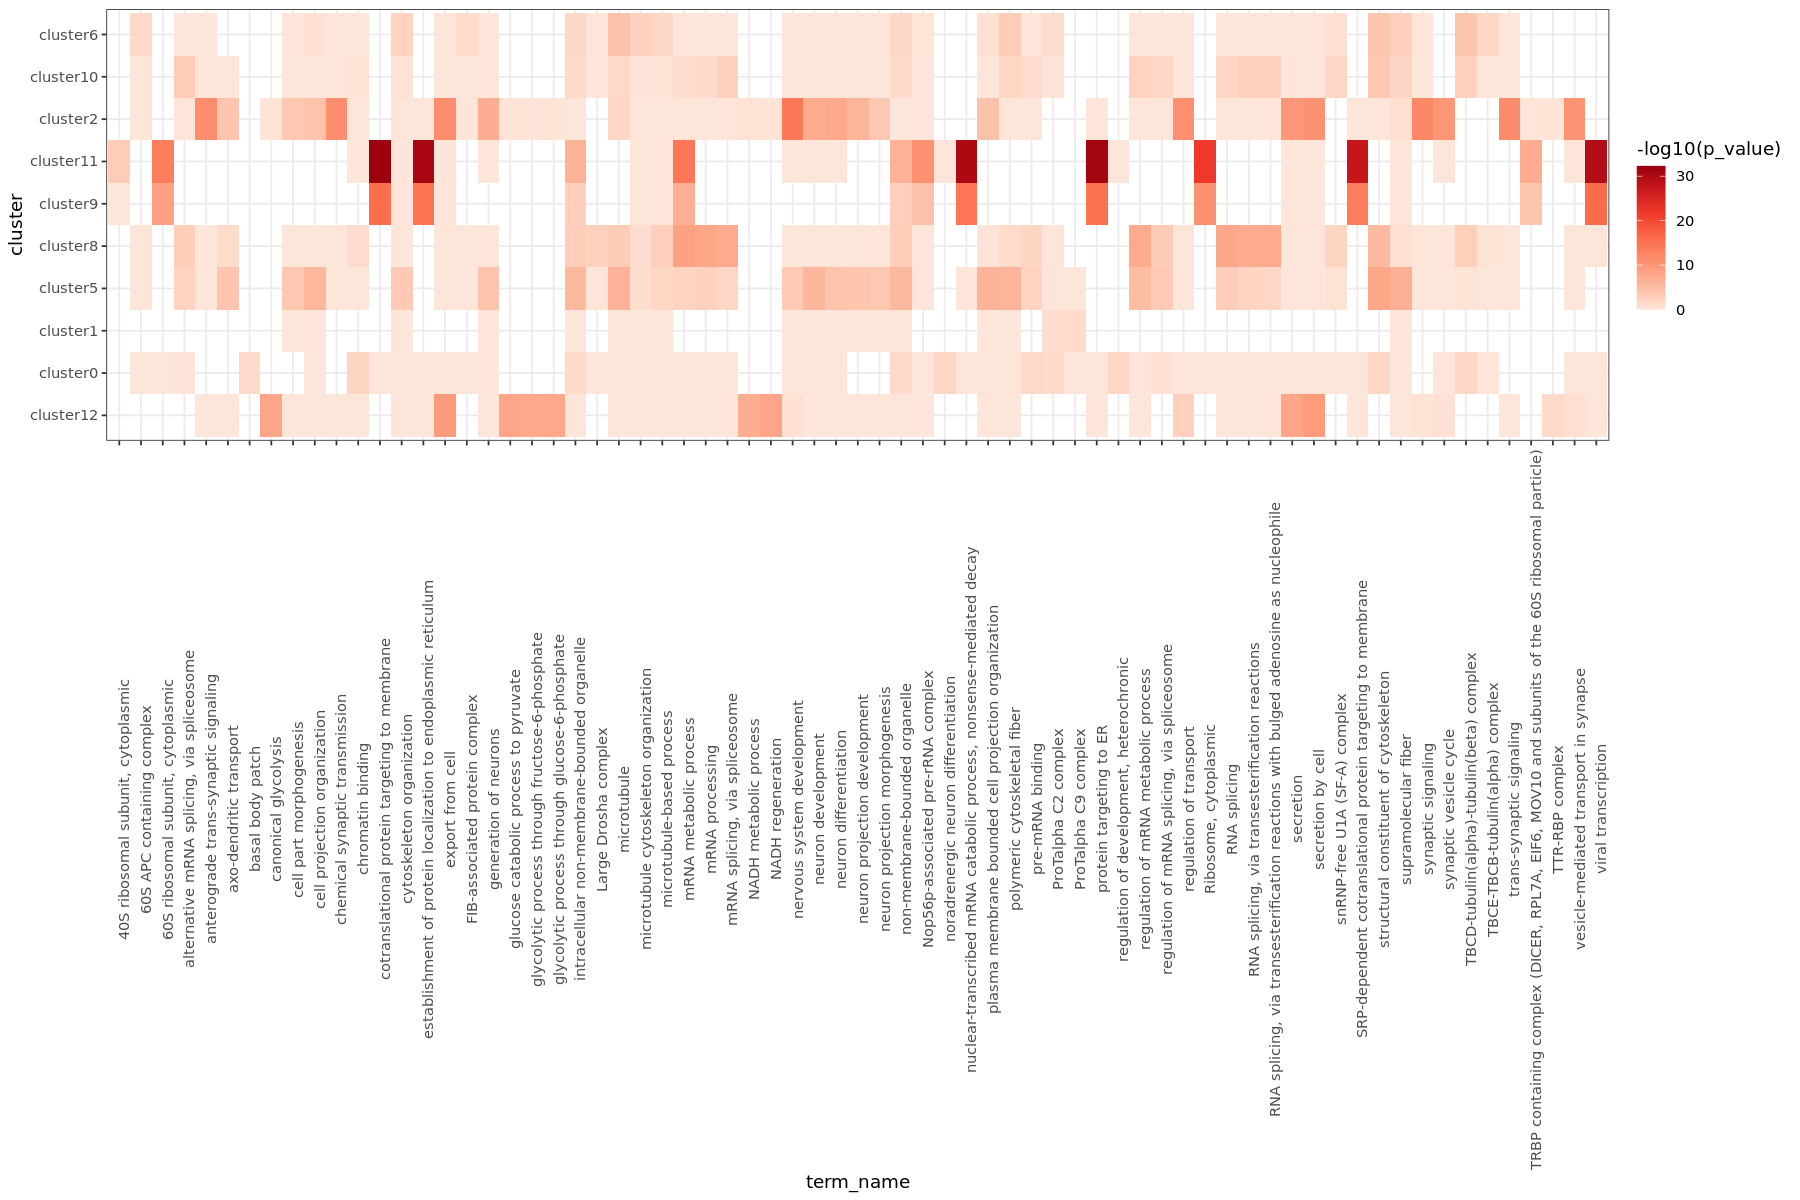

In [32]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(df_to_plot, aes(x=term_name, y=cluster, fill = -log10(p_value))) + geom_tile() + 
    theme_bw() + theme(axis.text.x = element_text(angle = 90)) + 
    scale_fill_gradientn(colors = brewer.pal(7,"Reds"))

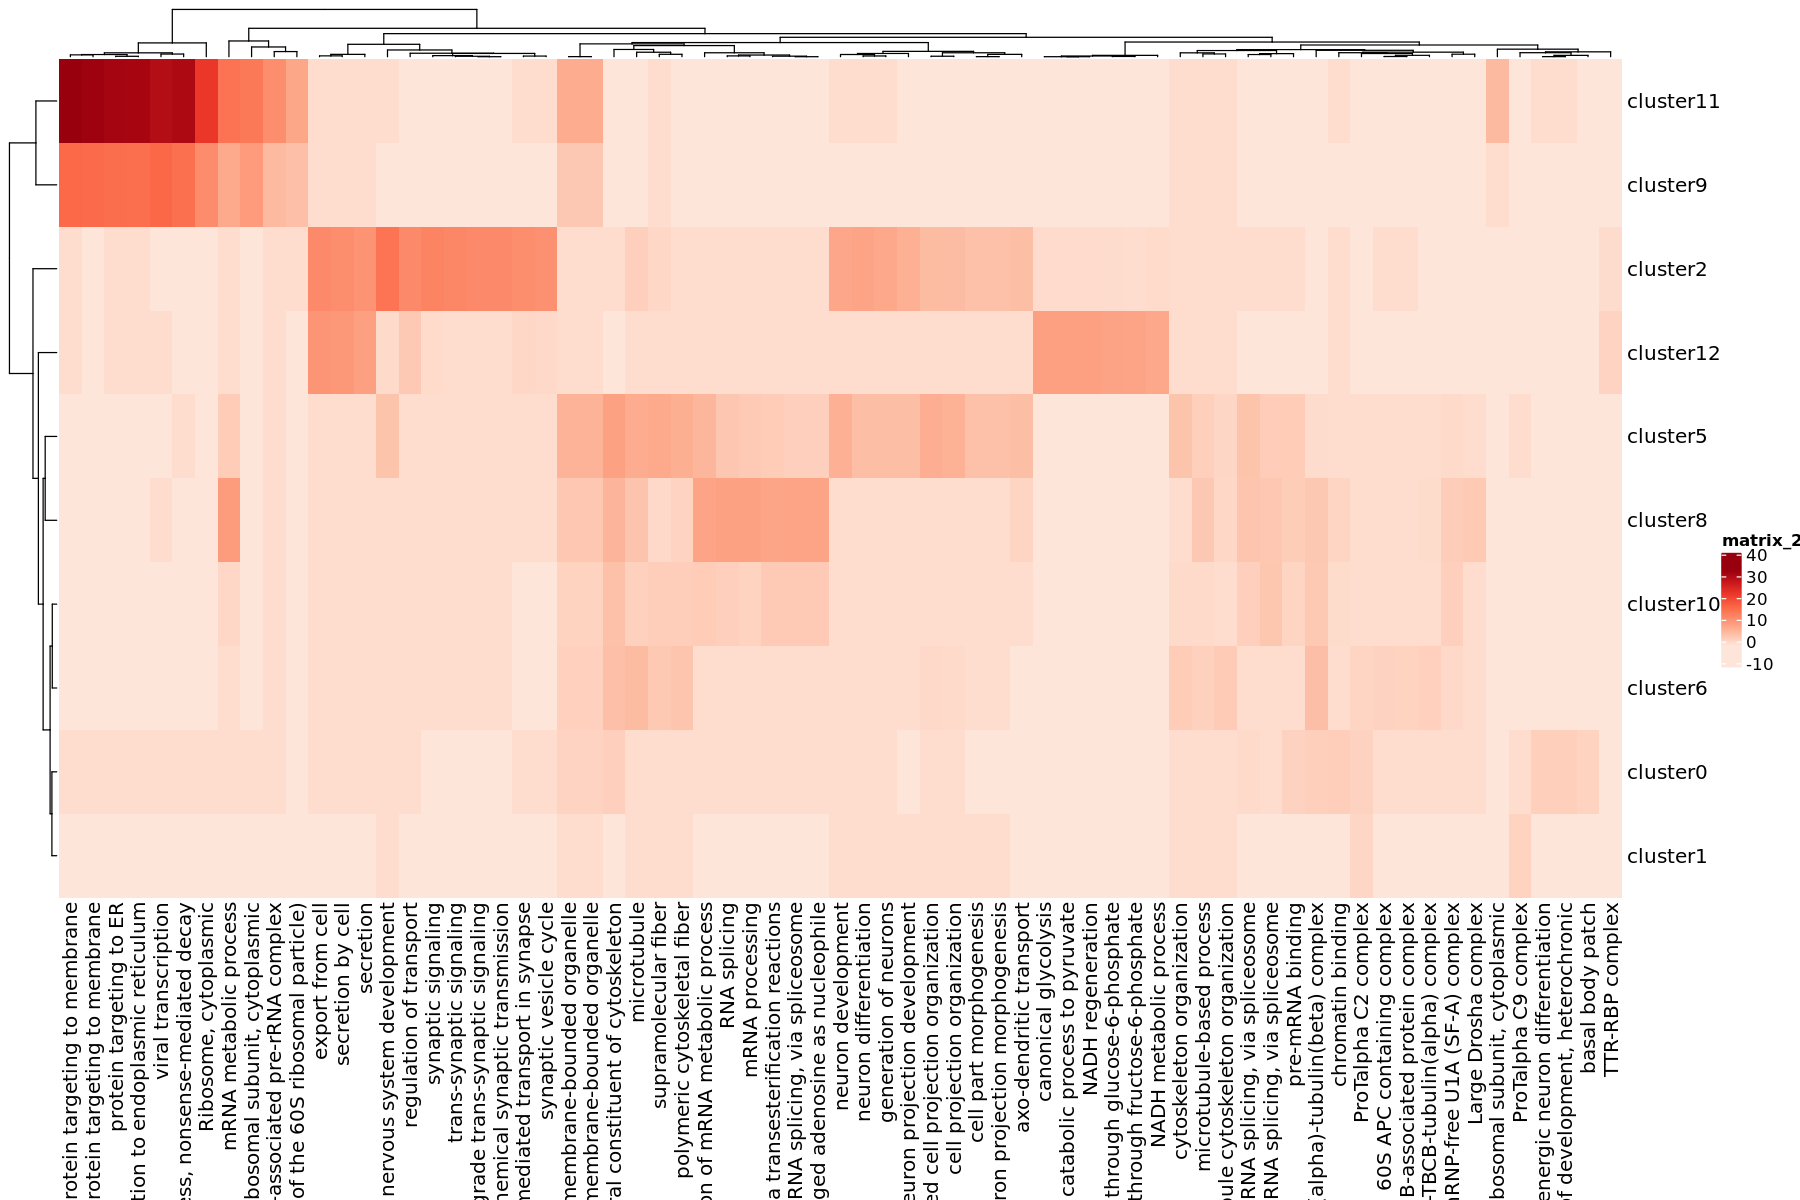

In [33]:
df_to_plot$cluster = as.character(df_to_plot$cluster)
df_to_plot$term_name = as.character(df_to_plot$term_name)
mat = matrix(0, nrow=length(unique(df_to_plot$cluster)), ncol=length(unique(df_to_plot$term_name)))
for (i in 1:nrow(mat)){
    cluster = unique(df_to_plot$cluster)[i]
    for (j in 1:ncol(mat)){
        term = unique(df_to_plot$term_name)[j]
#         print(term)
        if (length(df_to_plot[df_to_plot$cluster == cluster & df_to_plot$term_name == term,"p_value"]) == 0){next}
        mat[i,j] = min(df_to_plot[df_to_plot$cluster == cluster & df_to_plot$term_name == term,"p_value"])
    }
}
rownames(mat) = unique(df_to_plot$cluster)
colnames(mat) = unique(df_to_plot$term_name)
mat0 = -log10(mat)
mat0[mat0==Inf] = -1
Heatmap(mat0, col = brewer.pal(7,"Reds"))

In [34]:
########### Genes either positively or negatively correlated with cluster summary profiles

In [35]:
df_list = list()
for (i in 1:ncol(df)){
    gene_list = df[,i]
    names(gene_list) = rownames(df)
    # get positively correlated genes
    genes_pos = gene_list[gene_list>0.4]
    # AND negatively correlated genes
    genes_neg = gene_list[gene_list<(-0.4)]
    genes_corr = c(genes_pos, genes_neg)
    genes_corr = abs(genes_corr)
    if (length(genes_corr)==0){next}
    # order
    genes_corr = genes_corr[order(genes_corr,decreasing=TRUE)]
    # get gene names only
    genes = gsub(".*_","",names(genes_corr))
    # run gprofiler
    gres = gost(query=genes, organism = "hsapiens", ordered_query = TRUE, significant=FALSE)
    df_list[[i]] = as.data.frame(gres$result)
}

In [36]:
pats = c()
for (i in 1:length(df_list)){
    if (is.null(df_list[[i]])){next}
    df_curr = as.data.frame(df_list[[i]])
    df_curr = df_curr[df_curr$p_value < 0.05,]
#     print(nrow(df_curr))
    n = min(10, nrow(df_curr))
    pats = c(pats, unique(df_curr[1:n,"term_name"]))
}
length(pats)

[1] 121

In [37]:
df_to_plot = data.frame()
for (i in 1:length(df_list)){
#     print(i)
    cluster = gsub("corr_","",colnames(df)[i])
    df_curr = df_list[[i]]
    
    if (is.null(df_curr)){next}
    df_curr$cluster = cluster
    df_to_plot = rbind(df_to_plot, df_curr[df_curr$term_name %in% pats,
                                           c("p_value","cluster","term_name","term_id")])
}
unique(df_to_plot$cluster)
df_to_plot$cluster <- factor(df_to_plot$cluster, 
                             levels = c("cluster12", "cluster0", "cluster1", "cluster5", "cluster8",
                                        "cluster9", "cluster11", "cluster2", "cluster10", "cluster3",
                                        "cluster6", "cluster7", "cluster4"))

[1] "cluster0"  "cluster1"  "cluster10" "cluster11" "cluster12" "cluster2" 
 [7] "cluster3"  "cluster4"  "cluster5"  "cluster6"  "cluster7"  "cluster8" 
[13] "cluster9"

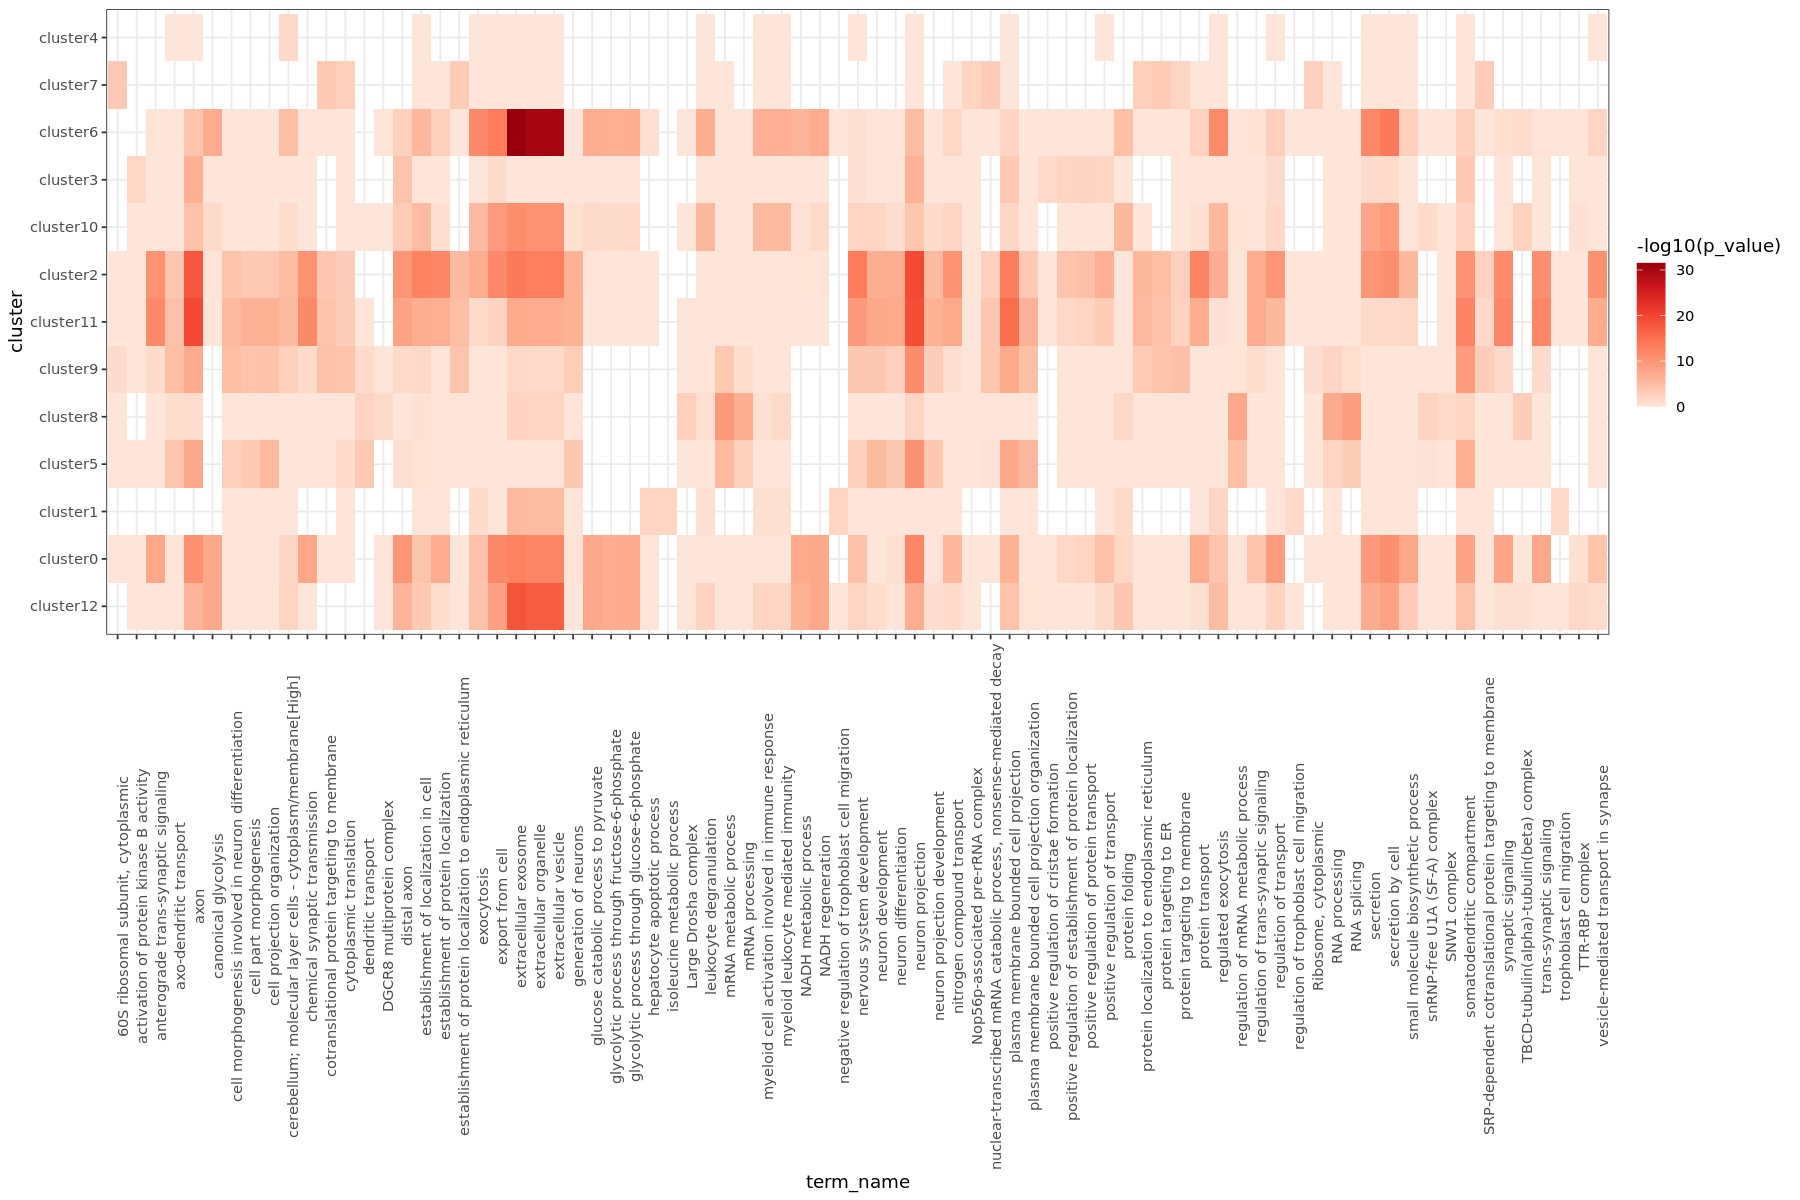

In [38]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(df_to_plot, aes(x=term_name, y=cluster, fill = -log10(p_value))) + geom_tile() + 
    theme_bw() + theme(axis.text.x = element_text(angle = 90)) + 
    scale_fill_gradientn(colors = brewer.pal(7,"Reds"))

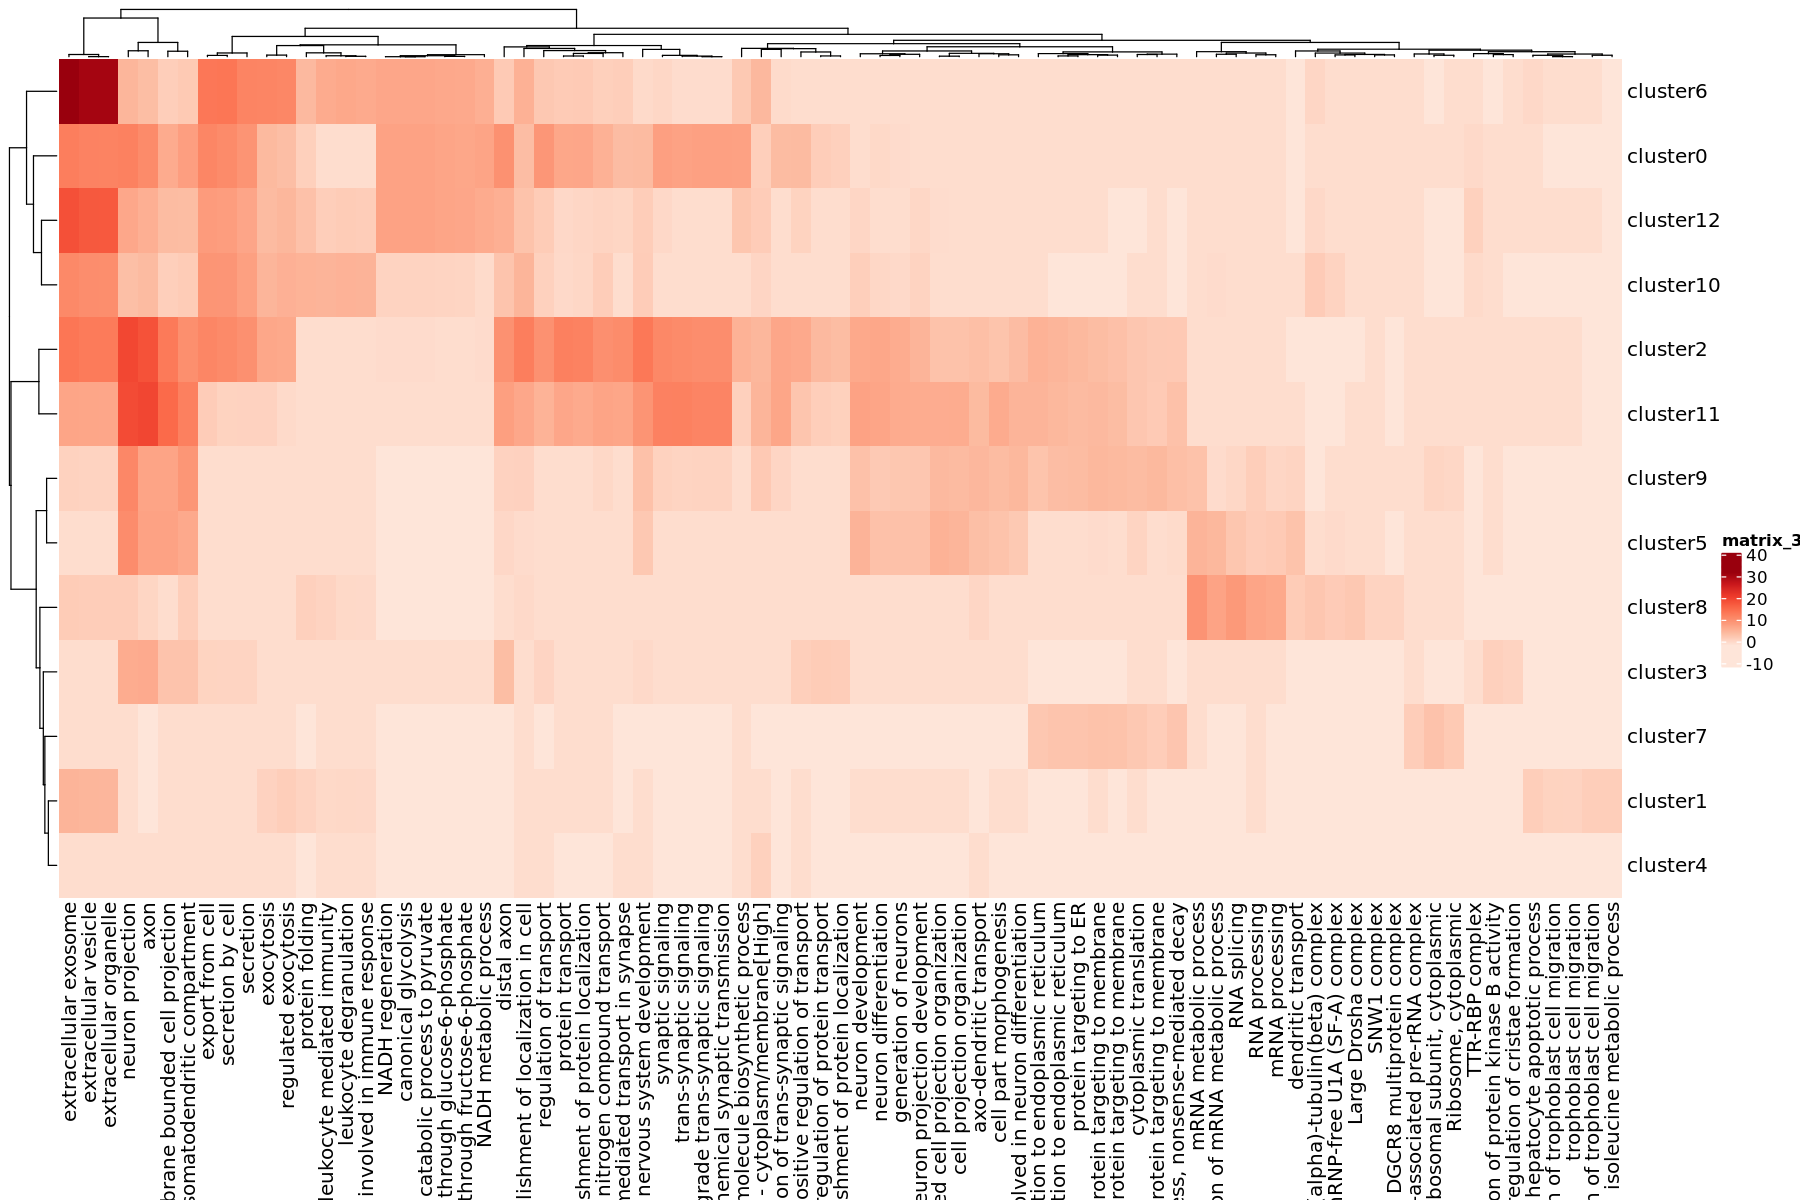

In [39]:
df_to_plot$cluster = as.character(df_to_plot$cluster)
df_to_plot$term_name = as.character(df_to_plot$term_name)
mat = matrix(0, nrow=length(unique(df_to_plot$cluster)), ncol=length(unique(df_to_plot$term_name)))
for (i in 1:nrow(mat)){
    cluster = unique(df_to_plot$cluster)[i]
    for (j in 1:ncol(mat)){
        term = unique(df_to_plot$term_name)[j]
#         print(term)
        if (length(df_to_plot[df_to_plot$cluster == cluster & df_to_plot$term_name == term,"p_value"]) == 0){next}
        mat[i,j] = min(df_to_plot[df_to_plot$cluster == cluster & df_to_plot$term_name == term,"p_value"])
    }
}
rownames(mat) = unique(df_to_plot$cluster)
colnames(mat) = unique(df_to_plot$term_name)
mat0 = -log10(mat)
mat0[mat0==Inf] = -1
Heatmap(mat0, col = brewer.pal(7,"Reds"))